<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder_daug_snoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-06-28 00:29:26--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-06-28 00:29:26--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [                 <=>]  75.50M  19.3MB/s    in 4.8s    

2024-06-28 00:29:32 (15.6 MB/s) - ‘master.zip’ saved [79168767]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
a7fe226267074d0c9fb03cfa3a74086a9188d974
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-main/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import math
import os
import random
import sys
from functools import partial
from inspect import signature
from pathlib import Path
from typing import (
    Any,
    Dict,
    List
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
    TransformerEnISLR
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement additive spatial noise.

In [ ]:
class RandomNoise():
    """Add random noise to joints coordinates.

    # Args:
      - apply_ratio: The ratio to apply augmentation.
      - scale_range: The range to augment scale of noise distribution.
      - scale_unit: The unit of scale. [asis/box_ratio]
        - asis: In this mode, the assigned `scale` value is used directly.
          So, the real noise value is calculated as,
          noise = np.random.uniform(low=-scale, high=scale)
        - box_ratio: In this mode, the `scale` value is assumed to indicate the
          ratio of rounded box (of diagonal) of target_joints.
          So, the real noise value is calculated as,
          scale = BoxSize(target_joint) * scale,
          noise = np.random.uniform(low=-scale, high=scale)
      - noise_type: The type of noise distribution [uniform/gauss].
      - target_joints: If defined, the noise is added only to target_joints.
      - feature_dim: The expected dimension of each joint.
      - include_conf: If True, we assume each joint includes confidence value
        after the coordinates.
    """
    def __init__(self,
                 apply_ratio,
                 scale_range,
                 scale_unit="asis",
                 noise_type="uniform",
                 target_joints=None,
                 feature_dim=3,
                 include_conf=True):
        assert noise_type in ["uniform", "gauss"]
        self.apply_ratio = apply_ratio
        self.scale_range = np.array(scale_range)
        self.scale_unit = scale_unit
        self.noise_type = noise_type
        self.feature_dim = feature_dim
        self.include_conf = include_conf
        self.target_joints = target_joints

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:

        if random.random() > self.apply_ratio:
            return data

        feature = data["feature"]
        # Remove confidence if it's included.
        if self.include_conf:
            confs = feature[-1:, :, :]
            feature = feature[:-1, :, :]
        else:
            confs = None

        # `[C, T, J]`
        target = feature[:, :, self.target_joints]
        # Generate mask to prevent adding noise to failed tracking.
        temp = target.reshape([target.shape[0], -1])
        bmask = (temp == 0).all(axis=0)
        bmask = np.bitwise_not(bmask)
        if bmask.any() == np.False_:
            return data
        # Calculate real scale.
        if self.scale_unit == "box_ratio":
            mins = temp[:, bmask].min(axis=1)
            maxes = temp[:, bmask].max(axis=1)
            size = np.linalg.norm(maxes - mins)
            scale_range = size * self.scale_range
        else:
            scale_range = self.scale_range
        aug_scale = np.random.random() * (scale_range[1] - scale_range[0]) + scale_range[0]
        # Mask for post-process.
        mask = bmask.reshape(
            [1, target.shape[1], target.shape[2]]).astype(target.dtype)
        if self.noise_type == "uniform":
            target += np.random.uniform(low=-aug_scale, high=aug_scale, size=target.shape)
        elif self.noise_type == "gauss":
            target += np.random.normal(loc=0.0, scale=aug_scale, size=target.shape)
        # Filter out failed tracking to zero.
        target *= mask
        feature[:, :, self.target_joints] = target
        # Back confidence.
        if confs is not None:
            feature = np.concatenate([feature, confs], axis=0)

        data["feature"] = feature
        return data

    def __str__(self):
        return f"{self.__class__.__name__}:{self.__dict__}"

# 4. Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/36257.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

apply_ratio = 0.5
scale_range = (1e-3, 1e-2)
target_joints = np.arange(0, len(use_landmarks))
feature_dim = len(use_features)
include_conf = False

pre_transforms = Compose([trans_select_feature,
                          trans_repnan])

transforms_default = Compose([
    trans_norm,
    ToTensor()])

In [ ]:
# Apply noise to whole joints before normalization.
transforms_snoise_prewhole_asis_uniform = Compose([
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="asis",
        noise_type="uniform",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])

transforms_snoise_prewhole_asis_gauss = Compose([
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="asis",
        noise_type="gauss",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])

transforms_snoise_prewhole_boxratio_uniform = Compose([
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type="uniform",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])

transforms_snoise_prewhole_boxratio_gauss = Compose([
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type="gauss",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])

In [ ]:
# Apply noise to whole joints after normalization.
transforms_snoise_postwhole_asis_uniform = Compose([
    trans_norm,
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="asis",
        noise_type="uniform",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

transforms_snoise_postwhole_asis_gauss = Compose([
    trans_norm,
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="asis",
        noise_type="gauss",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

transforms_snoise_postwhole_boxratio_uniform = Compose([
    trans_norm,
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type="uniform",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

transforms_snoise_postwhole_boxratio_gauss = Compose([
    trans_norm,
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type="gauss",
        target_joints=target_joints,
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

In [ ]:
# Apply noise to each parts.
target_joints = [
    np.arange(0, 76),  # Face
    np.arange(76, 76+21),  # LHand
    np.arange(76+21, 76+21+12),  # Pose
    np.arange(76+21+12, 76+21+12+21)  # RHand
]

# Before normalization.
noise_type = "uniform"
transforms_snoise_preparts_boxratio_uniform = Compose([
    # Face.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[0],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # LHand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[1],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Pose.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[2],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Rhand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[3],
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])

noise_type = "gauss"
transforms_snoise_preparts_boxratio_gauss = Compose([
    # Face.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[0],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # LHand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[1],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Pose.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[2],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Rhand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[3],
        feature_dim=feature_dim,
        include_conf=include_conf),
    trans_norm,
    ToTensor()])


# After normalization.
noise_type = "uniform"
transforms_snoise_postparts_boxratio_uniform = Compose([
    trans_norm,
    # Face.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[0],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # LHand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[1],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Pose.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[2],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Rhand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[3],
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

noise_type = "gauss"
transforms_snoise_postparts_boxratio_gauss = Compose([
    trans_norm,
    # Face.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[0],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # LHand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[1],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Pose.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[2],
        feature_dim=feature_dim,
        include_conf=include_conf),
    # Rhand.
    RandomNoise(
        apply_ratio=apply_ratio,
        scale_range=scale_range,
        scale_unit="box_ratio",
        noise_type=noise_type,
        target_joints=target_joints[3],
        feature_dim=feature_dim,
        include_conf=include_conf),
    ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

for trans in [transforms_default,
              transforms_snoise_prewhole_asis_uniform, transforms_snoise_prewhole_asis_gauss, transforms_snoise_prewhole_boxratio_uniform, transforms_snoise_prewhole_boxratio_gauss,
              transforms_snoise_postwhole_asis_uniform, transforms_snoise_postwhole_asis_gauss, transforms_snoise_postwhole_boxratio_uniform, transforms_snoise_postwhole_boxratio_gauss,
              transforms_snoise_preparts_boxratio_uniform, transforms_snoise_preparts_boxratio_gauss, transforms_snoise_postparts_boxratio_uniform, transforms_snoise_postparts_boxratio_gauss]:
    dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=trans)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
    try:
        data = next(iter(dataloader))
        feature_origin = data["feature"]

        print(feature_origin.shape)
    except Exception as inst:
        print(inst)

torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 232, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = True
tren_add_bias = True
tren_add_tailnorm = True

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

# 5. Train and evaluation

## 5.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


## 5.2 Run training process

### Default settings

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_default = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.729503 [    0/ 3881]
loss:1.974881 [ 3200/ 3881]
Done. Time:8.072904322999989
Training performance: 
 Avg loss:2.244985

Start validation.
Done. Time:0.33059089099998573
Validation performance: 
 Avg loss:2.115503

Start evaluation.
Done. Time:1.345861483999954
Test performance: 
 Accuracy:18.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.850599 [    0/ 3881]
loss:1.619900 [ 3200/ 3881]
Done. Time:4.653193901000009
Training performance: 
 Avg loss:1.628349

Start validation.
Done. Time:0.32728653899999927
Validation performance: 
 Avg loss:1.809397

Start evaluation.
Done. Time:1.3574655900000039
Test performance: 
 Accuracy:39.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.047790 [    0/ 3881]
loss:1.511675 [ 3200/ 3881]
Done

### Apply spatial noise (to whole joints before normalization).

##### (scale_unit, noise_type) = (asis, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_prewhole_asis_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_prewhole_asis_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_prewhole_asis_uniform)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_prewhole_asis_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_prewhole_asis_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_prewhole_asis_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_prewhole_asis_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_prewhole_asis_uniform, device)
        test_accs.append(acc)
train_losses_snoise_prewhole_asis_uniform = np.array(train_losses)
val_losses_snoise_prewhole_asis_uniform = np.array(val_losses)
test_accs_snoise_prewhole_asis_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_prewhole_asis_uniform.min()} at {np.argmin(val_losses_snoise_prewhole_asis_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_prewhole_asis_uniform.max()} at {np.argmax(test_accs_snoise_prewhole_asis_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.562884 [    0/ 3881]
loss:1.761862 [ 3200/ 3881]
Done. Time:7.333758199000044
Training performance: 
 Avg loss:2.115379

Start validation.
Done. Time:0.3943563579999818
Validation performance: 
 Avg loss:2.165740

Start evaluation.
Done. Time:1.364625507000028
Test performance: 
 Accuracy:31.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.055464 [    0/ 3881]
loss:1.047353 [ 3200/ 3881]
Done. Time:5.4304596819999915
Training performance: 
 Avg loss:1.454573

Start validation.
Done. Time:0.4256421169999385
Validation performance: 
 Avg loss:1.895030

Start evaluation.
Done. Time:1.7704224079999449
Test performance: 
 Accuracy:43.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.195247 [    0/ 3881]
loss:1.244220 [ 3200/ 3881]
Done.

##### (scale_unit, noise_type) = (asis, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_prewhole_asis_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_prewhole_asis_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_prewhole_asis_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_prewhole_asis_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_prewhole_asis_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_prewhole_asis_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_prewhole_asis_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_prewhole_asis_gauss, device)
        test_accs.append(acc)
train_losses_snoise_prewhole_asis_gauss = np.array(train_losses)
val_losses_snoise_prewhole_asis_gauss = np.array(val_losses)
test_accs_snoise_prewhole_asis_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_prewhole_asis_gauss.min()} at {np.argmin(val_losses_snoise_prewhole_asis_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_prewhole_asis_gauss.max()} at {np.argmax(test_accs_snoise_prewhole_asis_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.932139 [    0/ 3881]
loss:1.969127 [ 3200/ 3881]
Done. Time:7.598459360999868
Training performance: 
 Avg loss:2.149704

Start validation.
Done. Time:0.48216984600003343
Validation performance: 
 Avg loss:1.970897

Start evaluation.
Done. Time:1.3031555659999867
Test performance: 
 Accuracy:31.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.777523 [    0/ 3881]
loss:1.549037 [ 3200/ 3881]
Done. Time:5.503800930000125
Training performance: 
 Avg loss:1.581089

Start validation.
Done. Time:0.40918197299993153
Validation performance: 
 Avg loss:1.914662

Start evaluation.
Done. Time:1.307557441000199
Test performance: 
 Accuracy:31.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.406523 [    0/ 3881]
loss:1.451026 [ 3200/ 3881]
Done

##### (scale_unit, noise_type) = (box_ratio, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_prewhole_boxratio_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_prewhole_boxratio_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_prewhole_boxratio_uniform)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_prewhole_boxratio_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_prewhole_boxratio_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_prewhole_boxratio_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_prewhole_boxratio_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_prewhole_boxratio_uniform, device)
        test_accs.append(acc)
train_losses_snoise_prewhole_boxratio_uniform = np.array(train_losses)
val_losses_snoise_prewhole_boxratio_uniform = np.array(val_losses)
test_accs_snoise_prewhole_boxratio_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_prewhole_boxratio_uniform.min()} at {np.argmin(val_losses_snoise_prewhole_boxratio_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_prewhole_boxratio_uniform.max()} at {np.argmax(test_accs_snoise_prewhole_boxratio_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.814236 [    0/ 3881]
loss:1.688093 [ 3200/ 3881]
Done. Time:8.414435856999944
Training performance: 
 Avg loss:2.138627

Start validation.
Done. Time:0.40068229500002417
Validation performance: 
 Avg loss:2.141518

Start evaluation.
Done. Time:1.3378910530000212
Test performance: 
 Accuracy:28.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.838944 [    0/ 3881]
loss:1.436399 [ 3200/ 3881]
Done. Time:6.6972738149997895
Training performance: 
 Avg loss:1.439524

Start validation.
Done. Time:0.6747427959999186
Validation performance: 
 Avg loss:1.717175

Start evaluation.
Done. Time:2.3139276879999215
Test performance: 
 Accuracy:47.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.287256 [    0/ 3881]
loss:0.896558 [ 3200/ 3881]
Don

##### (scale_unit, noise_type) = (box_ratio, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_prewhole_boxratio_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_prewhole_boxratio_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_prewhole_boxratio_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_prewhole_boxratio_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_prewhole_boxratio_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_prewhole_boxratio_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_prewhole_boxratio_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_prewhole_boxratio_gauss, device)
        test_accs.append(acc)
train_losses_snoise_prewhole_boxratio_gauss = np.array(train_losses)
val_losses_snoise_prewhole_boxratio_gauss = np.array(val_losses)
test_accs_snoise_prewhole_boxratio_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_prewhole_boxratio_gauss.min()} at {np.argmin(val_losses_snoise_prewhole_boxratio_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_prewhole_boxratio_gauss.max()} at {np.argmax(test_accs_snoise_prewhole_boxratio_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.740728 [    0/ 3881]
loss:1.945078 [ 3200/ 3881]
Done. Time:6.447423907000029
Training performance: 
 Avg loss:2.159634

Start validation.
Done. Time:0.40544922599997335
Validation performance: 
 Avg loss:2.225709

Start evaluation.
Done. Time:1.3254743759998746
Test performance: 
 Accuracy:24.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.947216 [    0/ 3881]
loss:1.282333 [ 3200/ 3881]
Done. Time:8.575358412000014
Training performance: 
 Avg loss:1.541146

Start validation.
Done. Time:0.3992661089998819
Validation performance: 
 Avg loss:1.840851

Start evaluation.
Done. Time:1.3664172059998236
Test performance: 
 Accuracy:41.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.200617 [    0/ 3881]
loss:1.075452 [ 3200/ 3881]
Done

### Apply spatial noise (to whole joints after normalization).

##### (scale_unit, noise_type) = (asis, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postwhole_asis_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postwhole_asis_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postwhole_asis_uniform)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postwhole_asis_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postwhole_asis_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postwhole_asis_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postwhole_asis_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postwhole_asis_uniform, device)
        test_accs.append(acc)
train_losses_snoise_postwhole_asis_uniform = np.array(train_losses)
val_losses_snoise_postwhole_asis_uniform = np.array(val_losses)
test_accs_snoise_postwhole_asis_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postwhole_asis_uniform.min()} at {np.argmin(val_losses_snoise_postwhole_asis_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postwhole_asis_uniform.max()} at {np.argmax(test_accs_snoise_postwhole_asis_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.570049 [    0/ 3881]
loss:1.829013 [ 3200/ 3881]
Done. Time:5.46758315399984
Training performance: 
 Avg loss:2.082273

Start validation.
Done. Time:0.41717804400013847
Validation performance: 
 Avg loss:1.895836

Start evaluation.
Done. Time:1.3674500990000524
Test performance: 
 Accuracy:27.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.736280 [    0/ 3881]
loss:1.210357 [ 3200/ 3881]
Done. Time:7.160099433000141
Training performance: 
 Avg loss:1.404285

Start validation.
Done. Time:0.5644441039999037
Validation performance: 
 Avg loss:1.710501

Start evaluation.
Done. Time:1.3646136860002116
Test performance: 
 Accuracy:42.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.118017 [    0/ 3881]
loss:0.729546 [ 3200/ 3881]
Done.

##### (scale_unit, noise_type) = (asis, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postwhole_asis_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postwhole_asis_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postwhole_asis_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postwhole_asis_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postwhole_asis_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postwhole_asis_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postwhole_asis_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postwhole_asis_gauss, device)
        test_accs.append(acc)
train_losses_snoise_postwhole_asis_gauss = np.array(train_losses)
val_losses_snoise_postwhole_asis_gauss = np.array(val_losses)
test_accs_snoise_postwhole_asis_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postwhole_asis_gauss.min()} at {np.argmin(val_losses_snoise_postwhole_asis_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postwhole_asis_gauss.max()} at {np.argmax(test_accs_snoise_postwhole_asis_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.021064 [    0/ 3881]
loss:1.798193 [ 3200/ 3881]
Done. Time:6.666530191999755
Training performance: 
 Avg loss:2.079684

Start validation.
Done. Time:0.46167790200024683
Validation performance: 
 Avg loss:2.107233

Start evaluation.
Done. Time:1.363765351999973
Test performance: 
 Accuracy:21.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.811340 [    0/ 3881]
loss:1.279306 [ 3200/ 3881]
Done. Time:6.739810485999897
Training performance: 
 Avg loss:1.459543

Start validation.
Done. Time:0.7167413310003212
Validation performance: 
 Avg loss:2.051699

Start evaluation.
Done. Time:1.5098036140002478
Test performance: 
 Accuracy:32.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.150618 [    0/ 3881]
loss:1.065024 [ 3200/ 3881]
Done.

##### (scale_unit, noise_type) = (box_ratio, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postwhole_boxratio_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postwhole_boxratio_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postwhole_asis_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postwhole_boxratio_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postwhole_boxratio_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postwhole_boxratio_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postwhole_boxratio_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postwhole_boxratio_uniform, device)
        test_accs.append(acc)
train_losses_snoise_postwhole_boxratio_uniform = np.array(train_losses)
val_losses_snoise_postwhole_boxratio_uniform = np.array(val_losses)
test_accs_snoise_postwhole_boxratio_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postwhole_boxratio_uniform.min()} at {np.argmin(val_losses_snoise_postwhole_boxratio_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postwhole_boxratio_uniform.max()} at {np.argmax(test_accs_snoise_postwhole_boxratio_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.048837 [    0/ 3881]
loss:1.880005 [ 3200/ 3881]
Done. Time:5.855407746999845
Training performance: 
 Avg loss:2.147952

Start validation.
Done. Time:0.42856794399995124
Validation performance: 
 Avg loss:2.015229

Start evaluation.
Done. Time:1.3400864290001664
Test performance: 
 Accuracy:24.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.647456 [    0/ 3881]
loss:1.011299 [ 3200/ 3881]
Done. Time:8.15153459000021
Training performance: 
 Avg loss:1.495877

Start validation.
Done. Time:0.40827387900026224
Validation performance: 
 Avg loss:1.877542

Start evaluation.
Done. Time:1.3300852580000537
Test performance: 
 Accuracy:36.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.190718 [    0/ 3881]
loss:0.835387 [ 3200/ 3881]
Done

##### (scale_unit, noise_type) = (box_ratio, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postwhole_boxratio_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postwhole_boxratio_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postwhole_boxratio_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postwhole_boxratio_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postwhole_boxratio_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postwhole_boxratio_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postwhole_boxratio_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postwhole_boxratio_gauss, device)
        test_accs.append(acc)
train_losses_snoise_postwhole_boxratio_gauss = np.array(train_losses)
val_losses_snoise_postwhole_boxratio_gauss = np.array(val_losses)
test_accs_snoise_postwhole_boxratio_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postwhole_boxratio_gauss.min()} at {np.argmin(val_losses_snoise_postwhole_boxratio_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postwhole_boxratio_gauss.max()} at {np.argmax(test_accs_snoise_postwhole_boxratio_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.920201 [    0/ 3881]
loss:1.871812 [ 3200/ 3881]
Done. Time:7.996560926999791
Training performance: 
 Avg loss:2.101456

Start validation.
Done. Time:0.4753073400001995
Validation performance: 
 Avg loss:1.853802

Start evaluation.
Done. Time:1.3452631089999159
Test performance: 
 Accuracy:38.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.822377 [    0/ 3881]
loss:1.062953 [ 3200/ 3881]
Done. Time:8.115218729999924
Training performance: 
 Avg loss:1.410104

Start validation.
Done. Time:0.7254507860002377
Validation performance: 
 Avg loss:1.856539

Start evaluation.
Done. Time:1.8630963840000732
Test performance: 
 Accuracy:41.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.070488 [    0/ 3881]
loss:1.243754 [ 3200/ 3881]
Done.

### Apply spatial noise (to each parts before normalization).

##### (scale_unit, noise_type) = (box_ratio, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_preparts_boxratio_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_preparts_boxratio_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_preparts_boxratio_uniform)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_preparts_boxratio_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_preparts_boxratio_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_preparts_boxratio_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_preparts_boxratio_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_preparts_boxratio_uniform, device)
        test_accs.append(acc)
train_losses_snoise_preparts_boxratio_uniform = np.array(train_losses)
val_losses_snoise_preparts_boxratio_uniform = np.array(val_losses)
test_accs_snoise_preparts_boxratio_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_preparts_boxratio_uniform.min()} at {np.argmin(val_losses_snoise_preparts_boxratio_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_preparts_boxratio_uniform.max()} at {np.argmax(test_accs_snoise_preparts_boxratio_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.825800 [    0/ 3881]
loss:1.985712 [ 3200/ 3881]
Done. Time:8.631197564000104
Training performance: 
 Avg loss:2.178721

Start validation.
Done. Time:0.43466501999955653
Validation performance: 
 Avg loss:2.083144

Start evaluation.
Done. Time:1.3676276039996083
Test performance: 
 Accuracy:30.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.942681 [    0/ 3881]
loss:1.067047 [ 3200/ 3881]
Done. Time:6.402082169000096
Training performance: 
 Avg loss:1.549196

Start validation.
Done. Time:0.4326050370000303
Validation performance: 
 Avg loss:1.813719

Start evaluation.
Done. Time:1.5558714639992104
Test performance: 
 Accuracy:42.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.007653 [    0/ 3881]
loss:1.241633 [ 3200/ 3881]
Done

##### (scale_unit, noise_type) = (box_ratio, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_preparts_boxratio_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_preparts_boxratio_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_preparts_boxratio_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_preparts_boxratio_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_preparts_boxratio_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_preparts_boxratio_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_preparts_boxratio_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_preparts_boxratio_gauss, device)
        test_accs.append(acc)
train_losses_snoise_preparts_boxratio_gauss = np.array(train_losses)
val_losses_snoise_preparts_boxratio_gauss = np.array(val_losses)
test_accs_snoise_preparts_boxratio_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_preparts_boxratio_gauss.min()} at {np.argmin(val_losses_snoise_preparts_boxratio_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_preparts_boxratio_gauss.max()} at {np.argmax(test_accs_snoise_preparts_boxratio_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.317677 [    0/ 3881]
loss:1.894372 [ 3200/ 3881]
Done. Time:8.70239424600004
Training performance: 
 Avg loss:2.189114

Start validation.
Done. Time:0.4476951579999877
Validation performance: 
 Avg loss:2.044485

Start evaluation.
Done. Time:1.3838909400001285
Test performance: 
 Accuracy:34.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.742625 [    0/ 3881]
loss:1.250134 [ 3200/ 3881]
Done. Time:7.479616872000406
Training performance: 
 Avg loss:1.519846

Start validation.
Done. Time:0.6710181739999825
Validation performance: 
 Avg loss:1.728433

Start evaluation.
Done. Time:1.9346384999998918
Test performance: 
 Accuracy:39.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.110797 [    0/ 3881]
loss:1.272950 [ 3200/ 3881]
Done. 

### Apply spatial noise (to each parts after normalization).

##### (scale_unit, noise_type) = (box_ratio, uniform)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postparts_boxratio_uniform,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postparts_boxratio_uniform = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postparts_boxratio_uniform)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postparts_boxratio_uniform.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postparts_boxratio_uniform.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postparts_boxratio_uniform, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postparts_boxratio_uniform, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postparts_boxratio_uniform, device)
        test_accs.append(acc)
train_losses_snoise_postparts_boxratio_uniform = np.array(train_losses)
val_losses_snoise_postparts_boxratio_uniform = np.array(val_losses)
test_accs_snoise_postparts_boxratio_uniform = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postparts_boxratio_uniform.min()} at {np.argmin(val_losses_snoise_postparts_boxratio_uniform)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postparts_boxratio_uniform.max()} at {np.argmax(test_accs_snoise_postparts_boxratio_uniform)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.350634 [    0/ 3881]
loss:1.963294 [ 3200/ 3881]
Done. Time:6.593838120999862
Training performance: 
 Avg loss:2.172759

Start validation.
Done. Time:0.4656948560004821
Validation performance: 
 Avg loss:2.061795

Start evaluation.
Done. Time:1.481827410000733
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.767176 [    0/ 3881]
loss:1.183452 [ 3200/ 3881]
Done. Time:9.097664908000297
Training performance: 
 Avg loss:1.528688

Start validation.
Done. Time:0.4773208659999
Validation performance: 
 Avg loss:1.780440

Start evaluation.
Done. Time:1.490118792999965
Test performance: 
 Accuracy:40.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.089094 [    0/ 3881]
loss:1.053487 [ 3200/ 3881]
Done. Time

##### (scale_unit, noise_type) = (box_ratio, gauss)

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_snoise_postparts_boxratio_gauss,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_snoise_postparts_boxratio_gauss = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_snoise_postparts_boxratio_gauss)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_snoise_postparts_boxratio_gauss.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_snoise_postparts_boxratio_gauss.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_snoise_postparts_boxratio_gauss, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_snoise_postparts_boxratio_gauss, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_snoise_postparts_boxratio_gauss, device)
        test_accs.append(acc)
train_losses_snoise_postparts_boxratio_gauss = np.array(train_losses)
val_losses_snoise_postparts_boxratio_gauss = np.array(val_losses)
test_accs_snoise_postparts_boxratio_gauss = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_snoise_postparts_boxratio_gauss.min()} at {np.argmin(val_losses_snoise_postparts_boxratio_gauss)+1} epoch.")
print(f"Maximum accuracy:{test_accs_snoise_postparts_boxratio_gauss.max()} at {np.argmax(test_accs_snoise_postparts_boxratio_gauss)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.544741 [    0/ 3881]
loss:1.659932 [ 3200/ 3881]
Done. Time:6.858257171999867
Training performance: 
 Avg loss:2.151369

Start validation.
Done. Time:0.4663801289998446
Validation performance: 
 Avg loss:2.160279

Start evaluation.
Done. Time:1.458960541000124
Test performance: 
 Accuracy:24.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.692508 [    0/ 3881]
loss:1.392052 [ 3200/ 3881]
Done. Time:9.367132909999782
Training performance: 
 Avg loss:1.505884

Start validation.
Done. Time:0.49311596600000485
Validation performance: 
 Avg loss:1.762661

Start evaluation.
Done. Time:1.5122899600000892
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.290172 [    0/ 3881]
loss:1.013634 [ 3200/ 3881]
Done.

### Plort result
#### Recognition performance

##### Apply spatial noise (to whole joints before normalization).

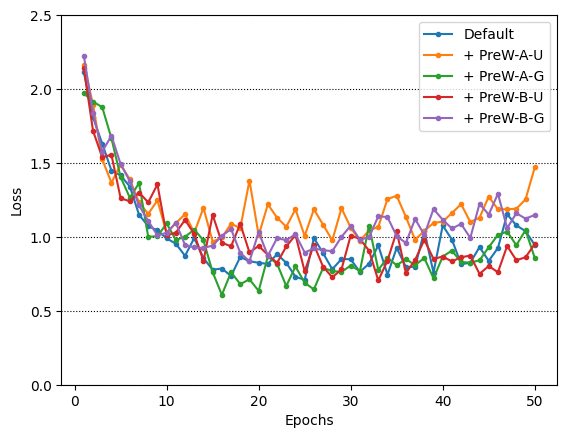

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_snoise_prewhole_asis_uniform, label="+ PreW-A-U", marker=".")
plt.plot(xs, val_losses_snoise_prewhole_asis_gauss, label="+ PreW-A-G", marker=".")
plt.plot(xs, val_losses_snoise_prewhole_boxratio_uniform, label="+ PreW-B-U", marker=".")
plt.plot(xs, val_losses_snoise_prewhole_boxratio_gauss, label="+ PreW-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

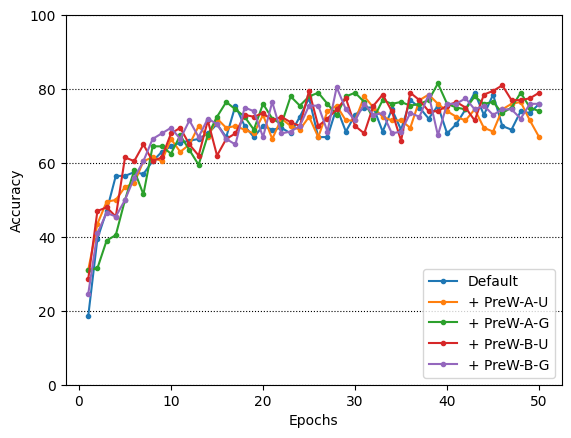

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_snoise_prewhole_asis_uniform, label="+ PreW-A-U", marker=".")
plt.plot(xs, test_accs_snoise_prewhole_asis_gauss, label="+ PreW-A-G", marker=".")
plt.plot(xs, test_accs_snoise_prewhole_boxratio_uniform, label="+ PreW-B-U", marker=".")
plt.plot(xs, test_accs_snoise_prewhole_boxratio_gauss, label="+ PreW-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

##### Apply spatial noise (to whole joints after normalization).

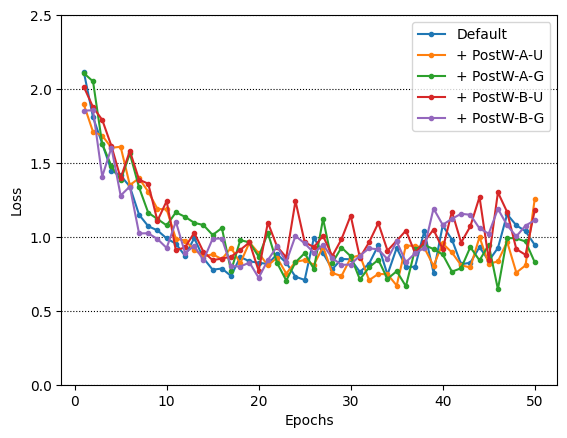

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_snoise_postwhole_asis_uniform, label="+ PostW-A-U", marker=".")
plt.plot(xs, val_losses_snoise_postwhole_asis_gauss, label="+ PostW-A-G", marker=".")
plt.plot(xs, val_losses_snoise_postwhole_boxratio_uniform, label="+ PostW-B-U", marker=".")
plt.plot(xs, val_losses_snoise_postwhole_boxratio_gauss, label="+ PostW-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

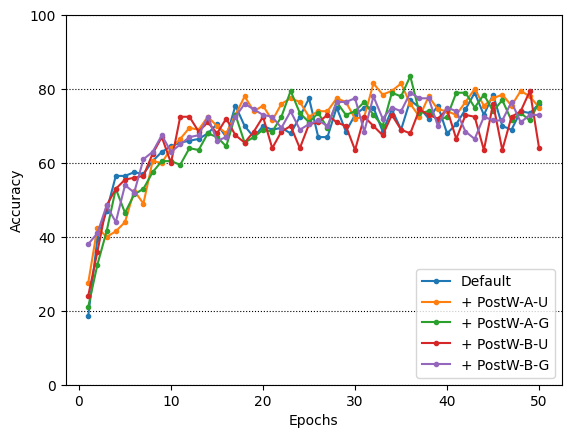

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_snoise_postwhole_asis_uniform, label="+ PostW-A-U", marker=".")
plt.plot(xs, test_accs_snoise_postwhole_asis_gauss, label="+ PostW-A-G", marker=".")
plt.plot(xs, test_accs_snoise_postwhole_boxratio_uniform, label="+ PostW-B-U", marker=".")
plt.plot(xs, test_accs_snoise_postwhole_boxratio_gauss, label="+ PostW-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

##### Apply spatial noise (to each parts).

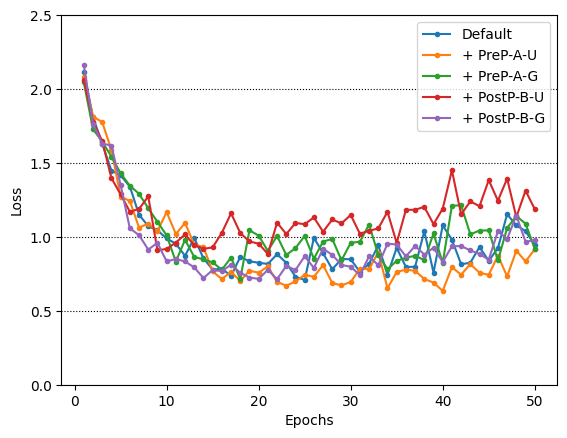

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_snoise_preparts_boxratio_uniform, label="+ PreP-A-U", marker=".")
plt.plot(xs, val_losses_snoise_preparts_boxratio_gauss, label="+ PreP-A-G", marker=".")
plt.plot(xs, val_losses_snoise_postparts_boxratio_uniform, label="+ PostP-B-U", marker=".")
plt.plot(xs, val_losses_snoise_postparts_boxratio_gauss, label="+ PostP-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

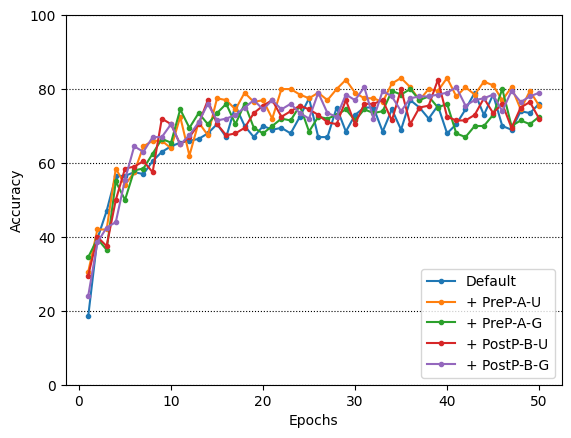

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_snoise_preparts_boxratio_uniform, label="+ PreP-A-U", marker=".")
plt.plot(xs, test_accs_snoise_preparts_boxratio_gauss, label="+ PreP-A-G", marker=".")
plt.plot(xs, test_accs_snoise_postparts_boxratio_uniform, label="+ PostP-B-U", marker=".")
plt.plot(xs, test_accs_snoise_postparts_boxratio_gauss, label="+ PostP-B-G", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()